In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("C:\\Users\\Mohammed Bhasith\\Downloads\\smartphones.csv")

In [3]:
df

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


# Data preprocessing

In [4]:
df.shape

(1816, 8)

In [5]:
df.size

14528

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [7]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [8]:
df["RAM"].value_counts()

RAM
8.0     381
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64

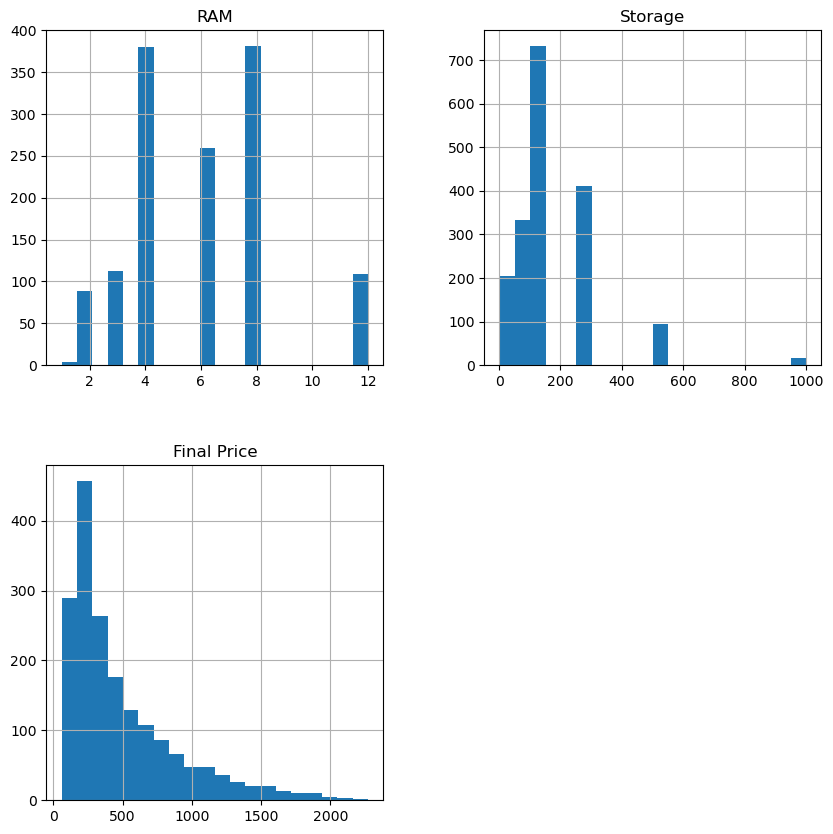

In [9]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [10]:
df["RAM"].fillna(df["RAM"].mean(),inplace=True)

In [11]:
df["Storage"].fillna(df["Storage"].median(),inplace=True)

In [12]:
df.describe()

,RAM,Storage,Final Price
count,1816.000000,1816.000000,1816.000000
mean,5.960990,162.175110,492.175573
std,2.285657,138.507038,398.606183
min,1.000000,2.000000,60.460000
25%,4.000000,64.000000,200.990000
50%,5.960990,128.000000,349.990000
75%,8.000000,256.000000,652.717500
max,12.000000,1000.000000,2271.280000


In [13]:
df["Free"].value_counts()

Free
Yes    1772
No       44
Name: count, dtype: int64

In [14]:
df=df.replace({"Free":{"Yes":1,"No":0}})

In [15]:
df["Free"].value_counts()

Free
1    1772
0      44
Name: count, dtype: int64

In [16]:
df["Color"].value_counts()

Color
Black        537
Blue         339
Gray         196
Green        180
White        170
Silver        86
Purple        80
Gold          68
Red           48
Pink          41
Orange        30
Yellow        24
Turquoise      5
Brown          4
Crystal        4
Bronze         3
Rainbow        1
Name: count, dtype: int64

In [17]:
df=df.drop(["Color"],axis=1)

In [18]:
df=df.drop(["Smartphone"],axis=1)

In [19]:
df["Storage"].value_counts()

Storage
128.0     757
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count, dtype: int64

In [20]:
df["Brand"].unique().T

array(['Realme', 'Samsung', 'Motorola', 'Xiaomi', 'Nothing', 'POCO',
       'Apple', 'OPPO', 'Alcatel', 'Vivo', 'ZTE', 'OnePlus', 'TCL', 'CAT',
       'SPC', 'Cubot', 'Google', 'Ulefone', 'Nokia', 'Honor', 'Huawei',
       'Sony', 'Hammer', 'Qubo', 'Blackview', 'Asus', 'Microsoft', 'BQ',
       'Crosscall', 'Doro', 'Fairphone', 'Funker', 'Gigaset', 'LG',
       'Maxcom', 'Swissvoice', 'Lenovo'], dtype=object)

In [21]:
def brand_category(i):
    top_rated=['Samsung','Apple','Google','Asus','OnePlus', 'Microsoft', 'Nokia', 'Honor', 'Huawei']
    mid_rated=['Realme','Motorola','Xiaomi','Nothing','OPPO','Lenovo','Sony']
    low_rated=['POCO','BQ','SPC','Vivo','ZTE', 'Cubot','Alcatel', 'Ulefone','Maxcom', 'Swissvoice', 'Crosscall', 'Doro', 'TCL', 'CAT', 'Fairphone', 'Funker', 'Gigaset', 'LG','Hammer', 'Qubo', 'Blackview',]
    
    if i in top_rated:
        return "Top_Rated"
    elif i in mid_rated:
        return "Mid_rated"
    else:
        return "Low_Rated"
df["Brand_Category"]=df["Brand"].apply(brand_category)

In [22]:
df.drop(["Model"],axis=1)


,Brand,RAM,Storage,Free,Final Price,Brand_Category
0,Realme,8.0,256.0,1,231.60,Mid_rated
1,Samsung,4.0,128.0,1,279.00,Top_Rated
2,Motorola,4.0,128.0,1,179.01,Mid_rated
3,Xiaomi,6.0,128.0,1,279.99,Mid_rated
4,Nothing,12.0,512.0,1,799.00,Mid_rated
...,...,...,...,...,...,...
1811,Xiaomi,4.0,64.0,1,249.01,Mid_rated
1812,Xiaomi,4.0,128.0,1,200.00,Mid_rated
1813,Xiaomi,4.0,128.0,1,269.00,Mid_rated
1814,Xiaomi,4.0,64.0,1,211.00,Mid_rated


In [23]:
df["Brand_Category"].value_counts()

Brand_Category
Top_Rated    882
Mid_rated    629
Low_Rated    305
Name: count, dtype: int64

In [24]:
df=df.replace({"Brand_Category":{"Top_Rated":1,"Mid_rated":2,"Low_Rated":3}})


In [25]:
df.isnull().sum()

Brand             0
Model             0
RAM               0
Storage           0
Free              0
Final Price       0
Brand_Category    0
dtype: int64

In [26]:
df=df.drop(["Brand","Model"],axis=1)

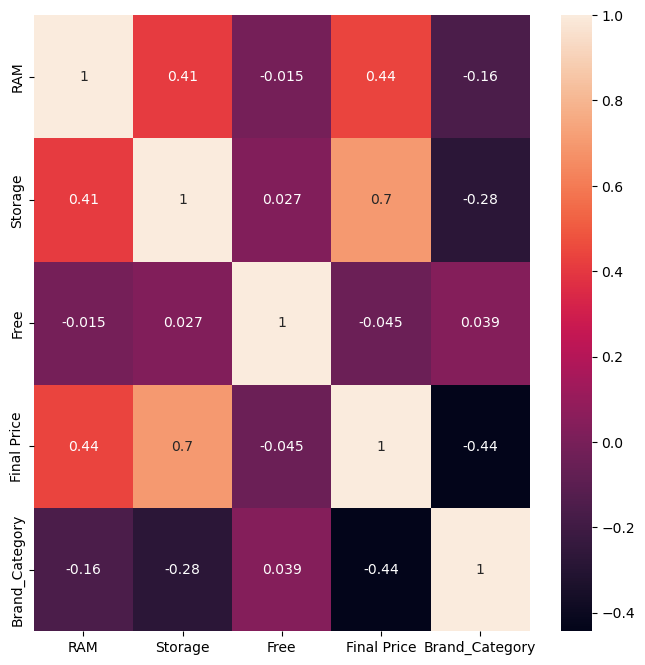

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,)
plt.show()

# split target and feature

In [28]:
X=df.drop(["Final Price"],axis=1)
Y=df["Final Price"]

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Logistic Regression

In [30]:
LR=LinearRegression()

In [31]:
LR.fit(X_train,Y_train)

LinearRegression()

In [32]:
training_pred=LR.predict(X_train)

In [33]:
testing_pred=LR.predict(X_test)

In [34]:
error_scoree=metrics.r2_score(Y_test,testing_pred)
print("R squared Error: ",error_scoree)

R squared Error:  0.6073498423143243


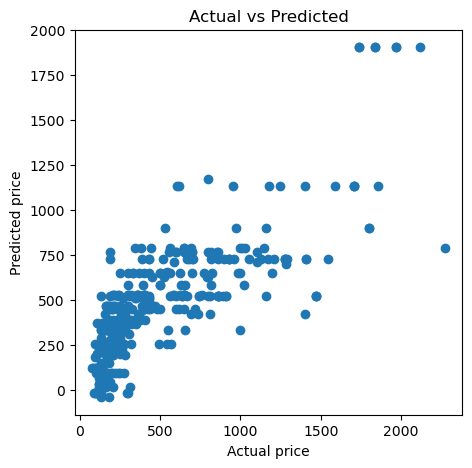

In [35]:
#visualization of actual and predicted price
plt.figure(figsize=(5,5))
plt.scatter(Y_test, testing_pred)
plt.xlabel('Actual price')
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

# Lasso Regression

In [36]:
LS=Lasso()

In [37]:
LS.fit(X_train,Y_train)

Lasso()

In [38]:
pred_train=LS.predict(X_train)

In [39]:
testing_pred_data=LS.predict(X_test)

In [40]:
rse=metrics.r2_score(Y_test,testing_pred_data)
print("rse is: ",rse)

rse is:  0.6074531889996575


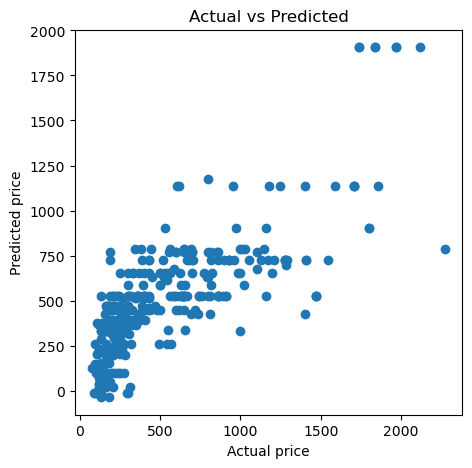

In [41]:
#visualization of actual and predicted price
plt.figure(figsize=(5,5))
plt.scatter(Y_test, testing_pred_data)
plt.xlabel('Actual price')
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

# SVM

In [42]:
model_svm=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)

In [43]:
model_svm.fit(X_train,Y_train)

SVR(C=100, gamma=0.1)

In [44]:
training=model_svm.predict(X_train)

In [46]:
testing=model_svm.predict(X_test)

In [47]:
rse=metrics.r2_score(Y_test,testing)
print("R2 Error :",rse)

R2 Error : 0.6123020880771518


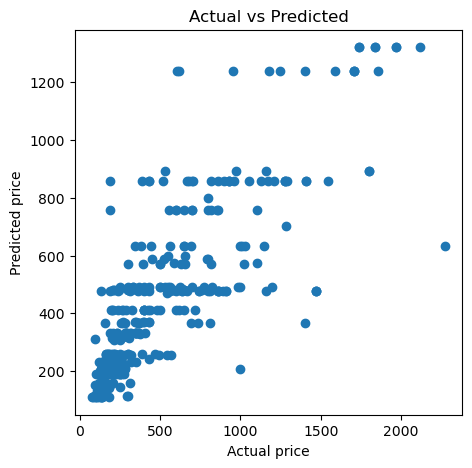

In [48]:
#visualization of actual and predicted price
plt.figure(figsize=(5,5))
plt.scatter(Y_test,testing)
plt.xlabel('Actual price')
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

# user input

In [61]:
input_data=[float(input(f"enter the feature entries {feature_name}"))
for feature_name in X.columns]

enter the feature entries RAM4
enter the feature entries Storage128
enter the feature entries Free1
enter the feature entries Brand_Category1


In [62]:
#covert values to 1D to 2D
input_array=np.array(input_data).reshape(1,-1)

In [63]:
#predict the values 
predicted_price=LR.predict(input_array)

C:\Users\Mohammed Bhasith\anaconda3\ZAP\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
#final result
print("Predicted price is:",predicted_price[0])

Predicted price is: 468.6589528826169
